In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import general
from helper import pca

In [21]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', 'X', '__globals__', '__version__'])

In [22]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

you do this to rotate the face clockwise 90 degree, I don't know why every pic I got from .mat file is in wrong orientation

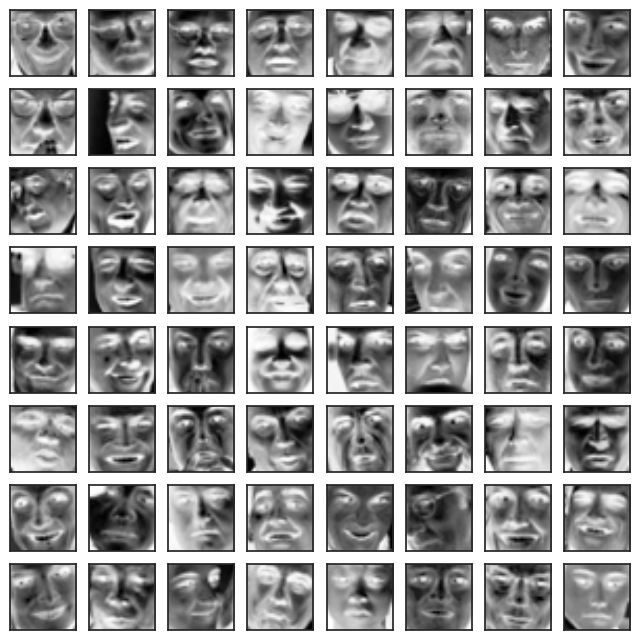

In [23]:
pca.plot_n_image(X, n=64)

# run PCA, find principle components

In [24]:
U, _, _ = pca.pca(X)

In [25]:
U.shape

(1024, 1024)

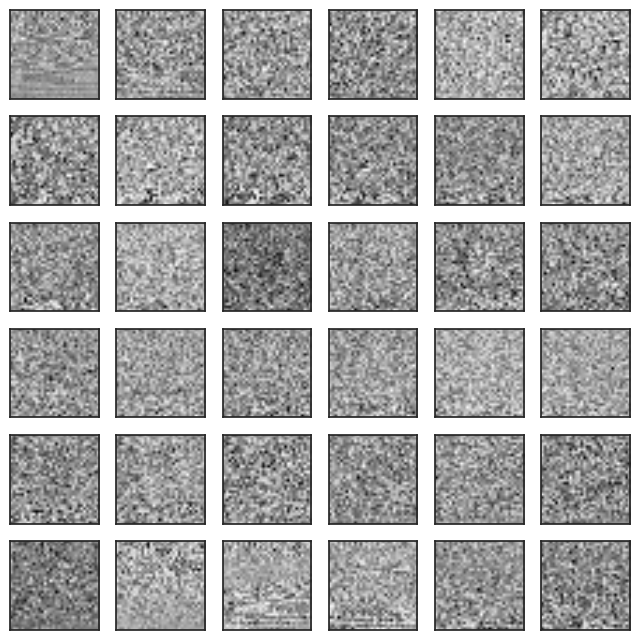

In [35]:
# didn't see face in principle components 
pca.plot_n_image(U, n=36)

I don't see face here...

# reduce dimension to `k=100`

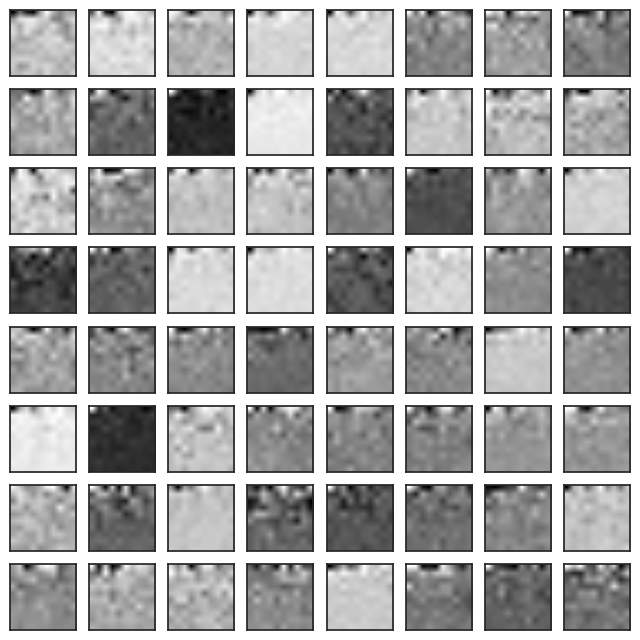

In [36]:
# no face in projected dimension too
Z = pca.project_data(X, U, k=100)
pca.plot_n_image(Z, n=64)

# recover from `k=100`
you lost some detail, but.. they are strikingly similar

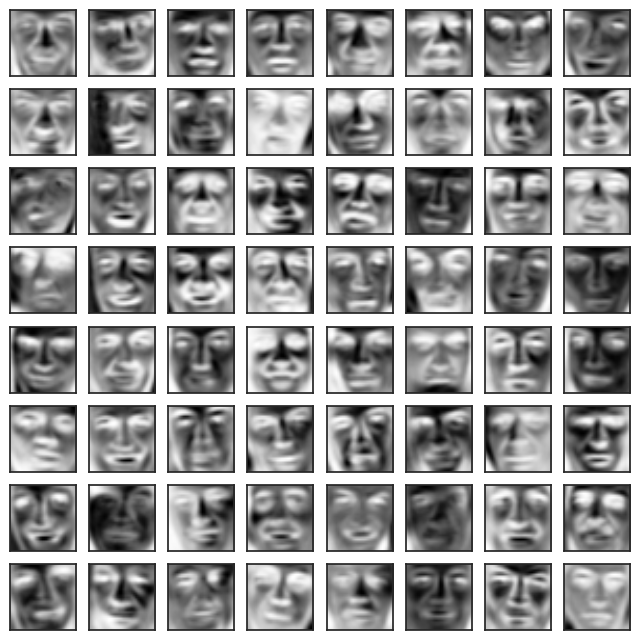

In [28]:
X_recover = pca.recover_data(Z, U)
pca.plot_n_image(X_recover, n=64)

# sklearn PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
sk_pca = PCA(n_components=100)

In [31]:
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

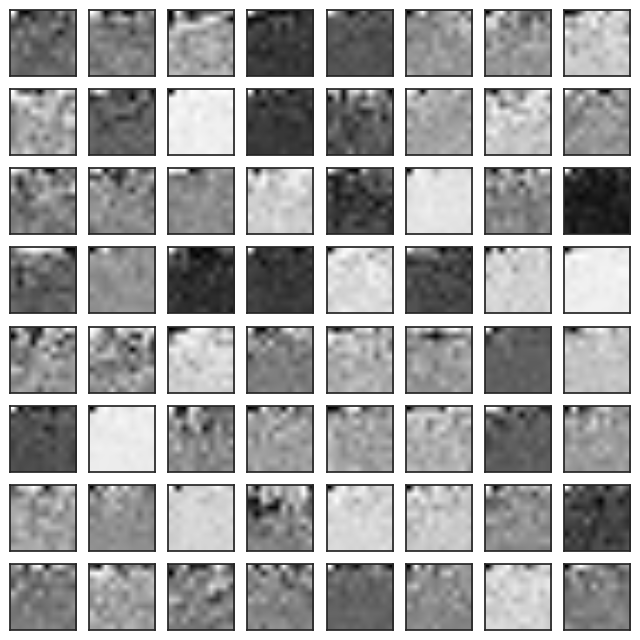

In [32]:
pca.plot_n_image(Z, 64)

In [33]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

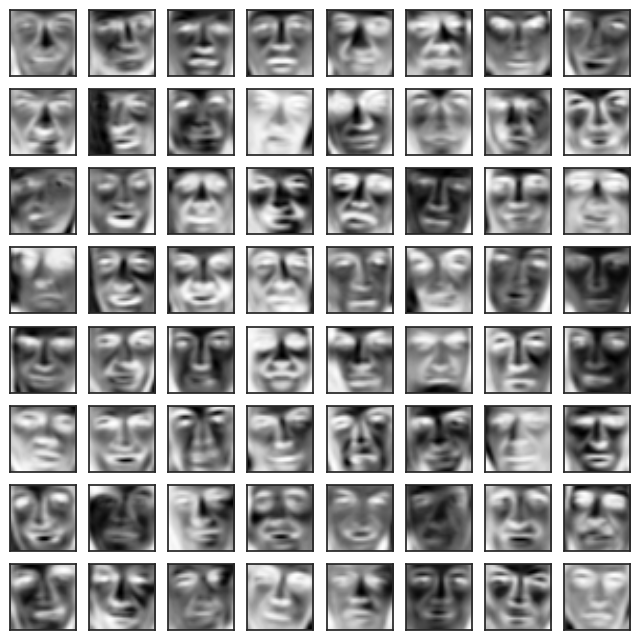

In [34]:
pca.plot_n_image(X_recover, n=64)